# I: Multiclass Perceptron:

<b>Background:</b>

- Assume we have N training examples {(x1,t1),...,(xN,tN)} where tn can get K discrete values {C1, ..., CK}, i.e. a K-class classification problem. We use 𝑦𝑛 to represent the predicted label of 𝑥𝑛

<b>Model:</b>

- To solve a K-class classification problem, we can learn K weight vectors wk, each of which corresponding to one of the classes.

<b>Prediction:</b>
- In the prediction time, a data point x will be classified as argmaxk wk . x


<b>Training Algorithm:</b>
- We train the multiclass perceptron based on the following algorithm:
    • Initialise the weight vectors randomly w1,..,wK
    • While not converged do:
        o For n = 1 to N do:
            ▪ y = argmaxk wk . xn
            ▪ If yn != tn do:
              o 𝒘𝑦𝑛:=𝒘𝑦𝑛−η𝒙𝑛 
              o 𝒘𝑡𝑛:=𝒘𝑡𝑛+η𝒙𝑛        

In [1]:
## Loading the necessary libraries:

library(reshape2)
library(ggplot2)
library(corrplot)
library(repr)

corrplot 0.84 loaded



 ## Basis Function and Implementation:
 
Choose and implement a basis function $\pmb{\phi}$, and initialize 3 weight vectors $\pmb{w1,w2,w3}$, learning rate $\eta$ and stopping threshold $\epsilon$ along with ***true labels*** and a matrix to hold ***errors***.

In [2]:
## Implementation of multiclass perceptron:

MCP <- function(train.data, train.label, eta=0.01, epsilon=0.001, tau.max=1000) {
    
    Phi <- as.matrix(cbind(1, train.data))                       ## add a column of 1 as phi_0
    eta <- 0.01                                                  ## Learning rate
    epsilon <- 0.001                                             ## Stoping criterion
    tau.max <- 1000                                              ## Maximum number of iterations
    
    T <- train.label                                             ## True label

    ## Weight vectors for each 3 classes:

    w1 <- matrix(,nrow=tau.max, ncol=ncol(Phi))                  ## Empty Weight vector1
    w2 <- matrix(,nrow=tau.max, ncol=ncol(Phi))                  ## Empty Weight vector2
    w3 <- matrix(,nrow=tau.max, ncol=ncol(Phi))                  ## Empty Weight vector3
    
    w1[1,] <- runif(ncol(Phi))                                   ## Random initial values for weight vector1
    w2[1,] <- runif(ncol(Phi))                                   ## Random initial values for weight vector2
    w3[1,] <- runif(ncol(Phi))                                   ## Random initial values for weight vector3

    error.trace = matrix(,nrow=tau.max, ncol=1)                  ## A matrix to store error values

    tau <- 1                                                     ## iteration counter 

    terminate <- FALSE                                           ## termination status
    
    while(!terminate){
    
    ## Shuffle the data:
        
        train.index <- sample(1:train.len, replace = FALSE)
        Phi <- Phi[train.index,]
        T <- T[train.index]
    
        ## For each data point:
        
        for (i in train.index){
        
            ## Check the termination creteria:
            
            if (tau == tau.max) {break}
        
            ## Calculate the predictions of current models for current point:
            
            pred1= w1[tau,]%*%Phi[i,]
            pred2= w2[tau,]%*%Phi[i,]
            pred3= w3[tau,]%*%Phi[i,]
            max = max(pred1,pred2,pred3)

        
            ## Misclassified conditions:
            
            if (pred1==max && T[i]!="C1"|pred2==max && T[i]!="C2"|pred3==max && T[i] !="C3"){
            
                ## Increase iteration counter:
                
                tau = tau +1
            
                ## Update weight vectors:
                
                if (T[i]=='C1' && max==pred2){
                    w1[tau,] = w1[tau-1,] + eta*Phi[i,]                        ## Adding the score to the correct answer
                    w2[tau,] = w2[tau-1,] - eta*Phi[i,]                        ## Reducing the score from the wrong answer
                    w3[tau,] = w3[tau-1,]                                      ## Leave it as it is

                }else if (T[i]=='C1' && max==pred3){
                    w1[tau,] = w1[tau-1,] + eta*Phi[i,]
                    w2[tau,] = w2[tau-1,]
                    w3[tau,] = w3[tau-1,] - eta*Phi[i,]

                }else if (T[i]=='C2' && max==pred1){
                    w1[tau,] = w1[tau-1,] - eta*Phi[i,]
                    w2[tau,] = w2[tau-1,] + eta*Phi[i,]
                    w3[tau,] = w3[tau-1,]
                }else if (T[i]=='C2' && max==pred3){
                    w1[tau,] = w1[tau-1,]
                    w2[tau,] = w2[tau-1,] + eta*Phi[i,]
                    w3[tau,] = w3[tau-1,] - eta*Phi[i,]

                }else if (T[i]=='C3' && max==pred2){
                    w1[tau,] = w1[tau-1,]
                    w2[tau,] = w2[tau-1,] - eta*Phi[i,]
                    w3[tau,] = w3[tau-1,] + eta*Phi[i,]

                }else if (T[i]=='C3' && max==pred1){
                    w1[tau,] = w1[tau-1,] - eta*Phi[i,]
                    w2[tau,] = w2[tau-1,]
                    w3[tau,] = w3[tau-1,] + eta*Phi[i,]

                }

            }        
    }
    
        ## Calculate predictions for current models and the error value:
        ## Store the weight vectors and and the predictions:
        
        mcp_predictions=as.data.frame(cbind(t(w1[tau,]%*%t(Phi)),t(w2[tau,]%*%t(Phi)),t(w3[tau,]%*%t(Phi))))
        for (row in 1:nrow(mcp_predictions)){
            mcp_predictions[row,'pred']=paste('C', which.max(mcp_predictions[row,]),sep = '')
        }
        
        ## Store the errors:
        
        error.percentage=1-(sum(mcp_predictions[,'pred']==T)/nrow(mcp_predictions))
    
    
        ## Recalculate termination conditions and terminate when one of the following conditions is met:
        
        terminate <- (tau >= tau.max | (error.percentage<=epsilon))
    }

    ## Trim the dataframes:
    
    w1 <- w1[1:tau,]
    w2 <- w2[1:tau,]
    w3 <- w3[1:tau,]
    
    return(list(w1,w2,w3,tau))
    
}

In [3]:
## Using the updated weights to make predictions:

MCP_preds <- function(test.data, test.label, w1, w2, w3){
    
    ## Test data appropriate for multiplication with model parameters:
    
    test.Phi <- as.matrix(cbind(1, test.data))

    ## Data frame to store error values and corresponding batch:
    
    error.percentage=data.frame(0,ncol=2)
    
    colnames(error.percentage)=c('Batch','Error Percentage')
    
    ## Initilise batch.no:
    batch.no=0

    ## For each batch:
    
    for (batch in seq(5,nrow(w1),5)){

        ## Calculate batch No:
        
        batch.no= batch.no + 1

        ## Make predictions on entire test data using each weight vector:
        
        mcp_predictions=as.data.frame(cbind(t(w1[batch,]%*%t(test.Phi)),t(w2[batch,]%*%t(test.Phi)),t(w3[batch,]%*%t(test.Phi))))     

        ## Classify predicted points
        for (row in 1:nrow(mcp_predictions)){
            mcp_predictions[row,'pred']=paste('C', which.max(mcp_predictions[row,]),sep = '')
        }

        ## Store Batch no and Ratio of missclassifications:
        
        error.percentage[batch.no,1]=batch.no
        error.percentage[batch.no,2]=1-(sum(mcp_predictions[,'pred']==test.label)/nrow(mcp_predictions))

}
    
    return(list(mcp_predictions, error.percentage))
    
}

## Scaling the data:

In [4]:
## Reading the training and testing files in R:

train_data <- read.csv("Task1D_train.csv", header = TRUE)
test_data <- read.csv("Task1D_test.csv", header = TRUE)


In [5]:
## Split data to train and test datasets:

#set.seed(123)

train.len <- nrow(train_data)
train.index <- sample(1:train.len, train.len, replace = FALSE)
train.data <- train_data[ , -5] 
train.label <- train_data[ , 5] 

test.len <- nrow(test_data)
test.data <- test_data[ , -5]
test.label <- test_data[ , 5]



In [6]:
unique(train_data[["y"]])

[1] "C1" "C2" "C3"

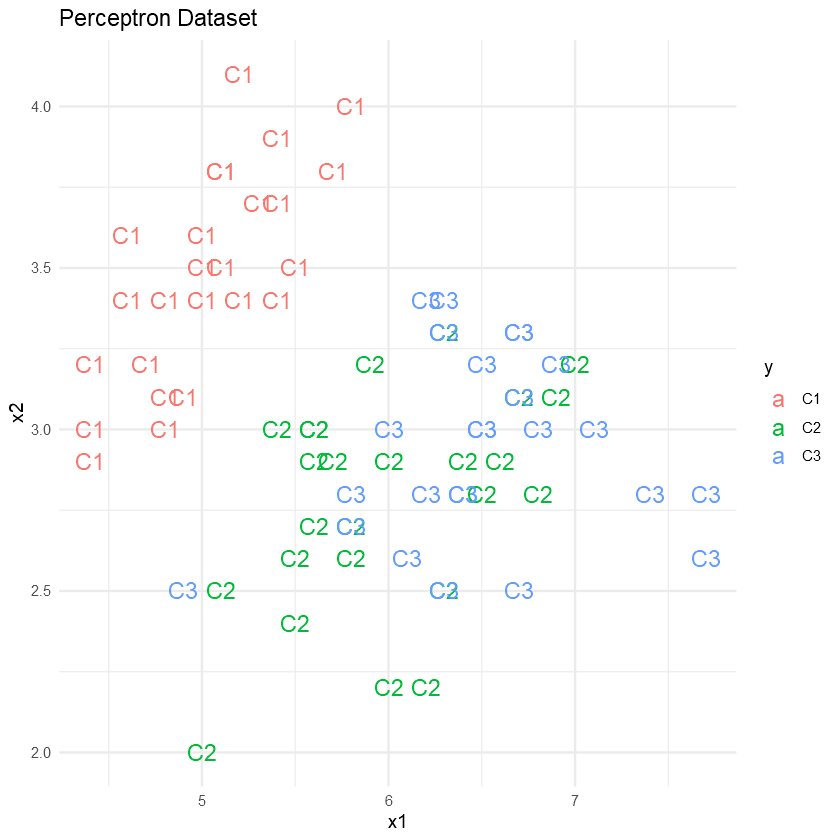

In [7]:
## Take a look at the data set:

ggplot(data=train_data, aes(x=x1, y=x2, a=x3, b=x4, color=y, label=ifelse(y=='C1', 'C1', ifelse(y=='C2', 'C2', 'C3')))) +
    geom_text(size = 5, alpha=1) +
    ggtitle ('Perceptron Dataset') +  
    theme_minimal()

In [8]:
train.data=scale(train.data)
test.data=scale(test.data)

## Modelling for learning rate η = 0.01:

In [9]:
## Train the model by keeping the other parameters same:


weight_vectors = MCP(train.data, train.label, eta=0.01, epsilon=0.001, tau.max=1000)
w1 = as.matrix(as.data.frame(weight_vectors[1]))
w2 = as.matrix(as.data.frame(weight_vectors[2]))
w3 = as.matrix(as.data.frame(weight_vectors[3]))
tau1 = as.matrix(as.data.frame(weight_vectors[4]))

## Make predictions:

learning1 = MCP_preds(test.data, test.label, w1, w2, w3)
predictions_mcp1 = as.data.frame(learning1[1])
error.percentage1 = as.data.frame(learning1[2])

tau1

X317
317


## Modelling for learning rate η = 0.09:

In [10]:
## Train the model:

weight_vectors1 = MCP(train.data, train.label, eta=0.09, epsilon=0.001, tau.max=1000)
w_1 = as.matrix(as.data.frame(weight_vectors1[1]))
w_2 = as.matrix(as.data.frame(weight_vectors1[2]))
w_3 = as.matrix(as.data.frame(weight_vectors1[3]))
tau2 = as.matrix(as.data.frame(weight_vectors1[4]))

## Make predictions:

learning2 = MCP_preds(test.data, test.label, w_1, w_2, w_3)
predictions_mcp2 = as.data.frame(learning2[1])
error.percentage2 = as.data.frame(learning2[2])

tau2

X179
179


## Visualization:

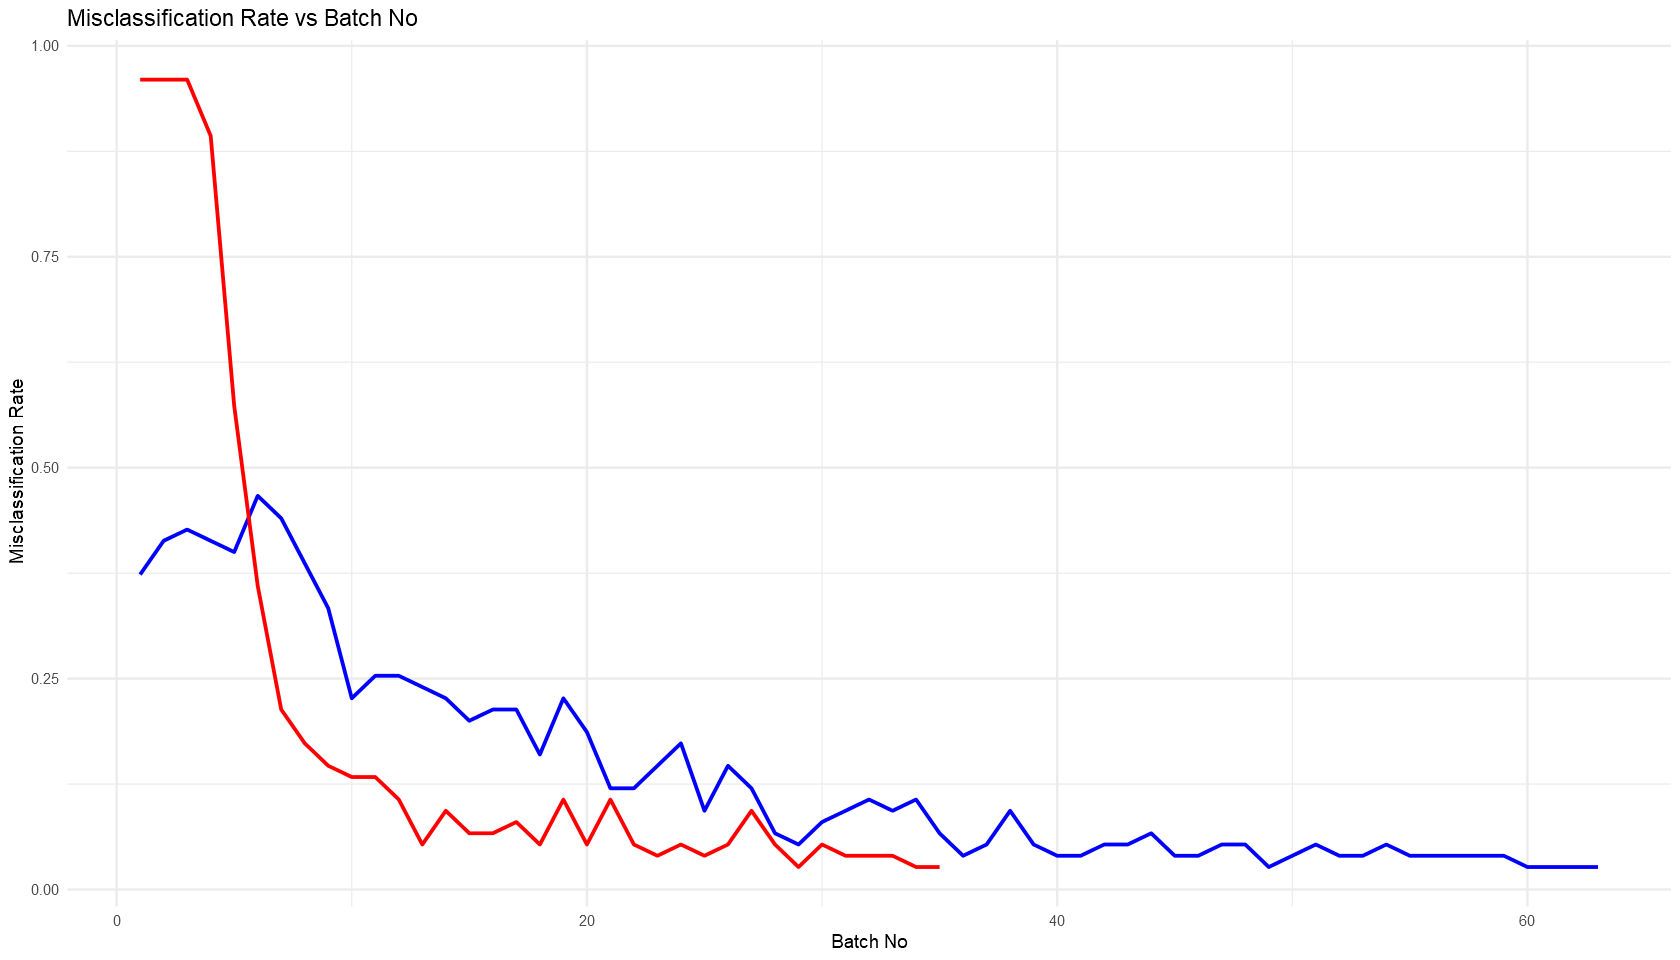

In [11]:
options(repr.plot.width=14, repr.plot.height=8)

ggplot() + 
geom_line(data=error.percentage1, aes(x=Batch, y=Error.Percentage), color='blue',size=0.8) + 
geom_line(data=error.percentage2, aes(x=Batch, y=Error.Percentage), color='red',size=0.8) + 
labs(y='Misclassification Rate', x='Batch No') +
ggtitle('Misclassification Rate vs Batch No') + theme_minimal()

### Observations:

* From the above graph it is observed that the model with **learning rate = 0.01 (the blue line)** takes **more iterations**  to reach the termination criteria while the model with **learning rate = 0.09 (the red line)** takes **less iterations** to reach the termination criteria given that all other parameters are kept constant.
* Also, the **misclassification rate** for **testing errors** for both models are decreasing as the iterations increase

## Note: Everytime the notebook is run, the results differ in case of number of iterations.

# References:

- https://www.kaggle.com/ - Multiclass Perceptron understanding